<a href="https://colab.research.google.com/github/adminho/machine-learning/blob/master/Pix2cde/26_pix2code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">

<h1>ใช้ AI แปลงภาพหน้าจอ GUI ให้กลายเป็นโค้ด</h1>

<br>

**ทำได้ทั้ง 3 แพลทฟอร์ม ไล่ตั้งแต่**

* เว็บ (HTML/CSS) 
* Android 
* และ iOS
<hr>

**<h3>Cite</h3>**

https://github.com/tonybeltramelli/pix2code

https://arxiv.org/abs/1705.07962

บทความไทย  https://www.patanasongsivilai.com/blog/ai-coding-gui/

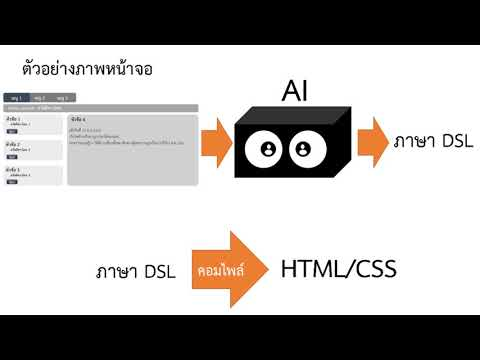

In [0]:
#@title Introducing pix2code
#@markdown คลิปการใช้ AI แปลงภาพหน้าจอ GUI ให้กลายเป็นโค้ด HTML/CSS
from IPython.display import YouTubeVideo
YouTubeVideo('7jW4SzF-1qE', width=600, height=400)

# Clone repo

โคลนนิ่งโค้ดจาก github

see https://github.com/tonybeltramelli/pix2code

In [0]:
!git clone https://github.com/tonybeltramelli/pix2code

Cloning into 'pix2code'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 758.45 MiB | 19.96 MiB/s, done.
Resolving deltas: 100% (67/67), done.
Checking out files: 100% (43/43), done.


# Install dependencies

In [0]:
#!pip install -r  requirements.txt

# Prepare the data:

ขั้นตอนเตรียมข้อมูล (รันครั้งแรกครั้งเดียวพอ ถ้ารันครั้งที่ 2 มันจะถามว่าแตกไฟล์ทับไฟล์เก่าไหม?)

In [0]:
# reassemble and unzip the data
%cd /content/pix2code/datasets
!zip -F pix2code_datasets.zip --out datasets.zip
!unzip datasets.zip

/content/pix2code/datasets
Fix archive (-F) - assume mostly intact archive
 copying: android/
 copying: android/all_data/
 copying: android/all_data/004D131C-C179-4D2A-8363-963223F76672.gui
 copying: android/all_data/004D131C-C179-4D2A-8363-963223F76672.png
 copying: android/all_data/00737CD8-275C-425C-810E-EC2C8123DE83.gui
 copying: android/all_data/00737CD8-275C-425C-810E-EC2C8123DE83.png
 copying: android/all_data/00C4F372-0111-405A-945E-C78C0E887BE7.gui
 copying: android/all_data/00C4F372-0111-405A-945E-C78C0E887BE7.png
 copying: android/all_data/00EAE181-AF3B-4CBD-928A-561FF6F4345F.gui
 copying: android/all_data/00EAE181-AF3B-4CBD-928A-561FF6F4345F.png
 copying: android/all_data/0123C40D-1198-4945-99C6-123FB855099C.gui
 copying: android/all_data/0123C40D-1198-4945-99C6-123FB855099C.png
 copying: android/all_data/016F8C96-9070-482E-A065-91E4554007DB.gui
 copying: android/all_data/016F8C96-9070-482E-A065-91E4554007DB.png
 copying: android/all_data/0176A280-F36A-4C74-846A-E71B03E2C16

ขั้นตอนนี้ใช้เวลาพอสมควร

In [0]:
%cd /content/pix2code/model

# split training set and evaluation set while ensuring no training example in the evaluation set
# usage: build_datasets.py <input path> <distribution (default: 6)>
!./build_datasets.py ../datasets/ios/all_data
!./build_datasets.py ../datasets/android/all_data
!./build_datasets.py ../datasets/web/all_data

# transform images (normalized pixel values and resized pictures) in training dataset to numpy arrays (smaller files if you need to upload the set to train your model in the cloud)
# usage: convert_imgs_to_arrays.py <input path> <output path>
!./convert_imgs_to_arrays.py ../datasets/ios/training_set ../datasets/ios/training_features
!./convert_imgs_to_arrays.py ../datasets/android/training_set ../datasets/android/training_features
!./convert_imgs_to_arrays.py ../datasets/web/training_set ../datasets/web/training_features

/content/pix2code/model
Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: ../datasets/ios/training_set
Evaluation dataset: ../datasets/ios/eval_set
Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: ../datasets/android/training_set
Evaluation dataset: ../datasets/android/eval_set
Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: ../datasets/web/training_set
Evaluation dataset: ../datasets/web/eval_set
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/ios/training_features
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/android/training_features
Converting images to numpy arrays...
Numpy arrays saved in ../datasets/web/training_features


# Train the model:

สอนโมเดลให้ฉลาด

In [0]:
%mkdir /content/pix2code/bin
%cd /content/pix2code/model

mkdir: cannot create directory ‘/content/pix2code/bin’: File exists
/content/pix2code/model


<h3>Mounting Google Drive locally</h3>

เมาท์ไปที่่ google drive (ติดตั้ง google drive ที่เครื่องตัวเอง) 

เพื่อที่จะเซฟไฟล์โมเดลที่ถูกเทรนขึ้นมาที่เครื่องเรา

ไม่เช่นนั้น โมเดลที่ถูกเทรนจะเก็บไว้ที่คลานด์ ซึ่งเก็บไว้ชั่วคราว 

พอปิดหน้าเว็บ โมเดลที่อุตสาเทรนไว้เสียดิบดี ก็จะหายไป 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!mkdir '/content/gdrive/My Drive/tmp/pix2code_model'

mkdir: cannot create directory ‘/content/gdrive/My Drive/tmp/pix2code_model’: File exists


<strong><font size="3" color="red">เป็นคอมมานด์ในการเทรนโมเดล ซึ่งจะใช้เวลานานมากโข หลายชั่วโมง ระหว่างเทรนห้ามปิดหน้าเว็บนี้เด็ดขาด เดี่ยว session ที่รันจะตัดเอา</font></strong>

In [0]:
# provide input path to training data and output path to save trained model and metadata
# usage: train.py <input path> <output path> <is memory intensive (default: 0)> <pretrained weights (optional)>
# !./train.py ../datasets/web/training_set ../bin

# train on images pre-processed as arrays
#!./train.py ../datasets/web/training_features ../bin

# train with generator to avoid having to fit all the data in memory (RECOMMENDED)
#!./train.py ../datasets/web/training_features ../bin 1 
!./train.py ../datasets/web/training_features '/content/gdrive/My Drive/tmp/pix2code_model' 1

# train on top of pretrained weights
#!./train.py ../datasets/web/training_features ../bin 1 ../bin/pix2code.h5

2019-02-09 22:45:44.827749: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-09 22:45:44.828059: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x261b1e0 executing computations on platform Host. Devices:
2019-02-09 22:45:44.828124: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-09 22:45:44.984803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-09 22:45:44.985408: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x261ab00 executing computations on platform CUDA. Devices:
2019-02-09 22:45:44.985442: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-02-09 22:45:44.985818: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found d

# แปลงภาพ GUI เป็นไฟล์ .gui (ภาษา DSL)

มีสองวิธี 

1) อ่านภาพGUI ทั้งหมดในโฟลเดอร์

2) อ่านภาพ GUI ทีละไฟล์

In [0]:
!cp -R '/content/gdrive/My Drive/tmp/pix2code_model' /content/pix2code/
!rm -rf /content/pix2code/bin
!mv /content/pix2code/pix2code_model /content/pix2code/bin
#!ls /content/pix2code/bin

## Generate code for batch of GUIs:

วิธี 1) จะอ่านภาพ GUI ทั้งหมดจากโฟลเดอร์ ../gui_screenshots เพื่อแปลงเป็น .gui ทีเดียว (ภาษา DSL)

ดาวน์โหลไฟล์ภาพ GUI 

In [0]:
!mkdir /content/pix2code/model/gui_screenshots
%cd /content/pix2code/model/gui_screenshots

!wget  https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/00CDC9A8-3D73-4291-90EF-49178E408797.png -O 00CDC9A8-3D73-4291-90EF-49178E408797.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/0173F54E-D99E-43E6-A6B0-B9087837E36A.png -O 0173F54E-D99E-43E6-A6B0-B9087837E36A.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/01D23C26-B39F-475F-9961-9DAFF0B987A3.png -O 01D23C26-B39F-475F-9961-9DAFF0B987A3.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/042B145D-1E0D-47CB-B16C-7F49B64DFF53.png -O 042B145D-1E0D-47CB-B16C-7F49B64DFF53.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.png -O 0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.png
!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/3FFBB381-17C9-4078-B038-E2CA2F200BA7.png -O 3FFBB381-17C9-4078-B038-E2CA2F200BA7.png
  
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png -O drawn_example1.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example2.png -O drawn_example2.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example3.png -O drawn_example3.png
    
!ls

mkdir: cannot create directory ‘/content/pix2code/model/gui_screenshots’: File exists
/content/pix2code/model/gui_screenshots
--2019-03-19 10:29:18--  https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/00CDC9A8-3D73-4291-90EF-49178E408797.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209605 (205K) [image/png]
Saving to: ‘00CDC9A8-3D73-4291-90EF-49178E408797.png’

00CDC9A8-3D73-4291- 100%[===================>] 204.69K  --.-KB/s    in 0.02s   

2019-03-19 10:29:19 (12.2 MB/s) - ‘00CDC9A8-3D73-4291-90EF-49178E408797.png’ saved [209605/209605]

--2019-03-19 10:29:22--  https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/0173F54E-D99E-43E6-A6B0-B9087837E36A.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.

เวลาในการรัน ขึ้นอยู่กับจำนวนรูปในโฟลเดอร์ gui_screenshots

In [0]:
!mkdir /content/pix2code/code
%cd /content/pix2code/model
     
# generate DSL code (.gui file), the default search method is greedy
# usage: generate.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#./generate.py ../bin pix2code ../gui_screenshots ../code

# equivalent to command above
#./generate.py ../bin pix2code ../gui_screenshots ../code greedy

# generate DSL code with beam search and a beam width of size 3
#!./generate.py ../bin pix2code ../gui_screenshots ../code 3

!./generate.py ../bin pix2code /content/pix2code/model/gui_screenshots/ ../code 3

mkdir: cannot create directory ‘/content/pix2code/code’: File exists
/content/pix2code/model
Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2019-03-19 10:29:58.327715: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-19 10:29:58.328083: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x968c6e0 executing computations on platform Host. Devices:
2019-03-19 10:29:58.328123: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-19 10:29:58.435481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-19 10:29:58.436108: I tensorflow/compiler/xla/service/service.cc:150]

In [0]:
!ls ../code

00CDC9A8-3D73-4291-90EF-49178E408797.gui  drawn_example1.gui
0173F54E-D99E-43E6-A6B0-B9087837E36A.gui  drawn_example2.gui
01D23C26-B39F-475F-9961-9DAFF0B987A3.gui  drawn_example3.gui
042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui  test_gui.gui
0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.gui  test_gui.html
3FFBB381-17C9-4078-B038-E2CA2F200BA7.gui


# Generate code for a single GUI image:

วิธี 2 ) อ่านภาพ GUI ทีละภาพ แล้วสร้างโค้ดขึ้นมา

In [0]:
#!wget https://raw.githubusercontent.com/fjbriones/pix2code2/master/tests/00CDC9A8-3D73-4291-90EF-49178E408797.png -O /content/pix2code/test_gui.png
!wget https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png -O /content/pix2code/test_gui.png

--2019-03-19 10:45:33--  https://raw.githubusercontent.com/ashnkumar/sketch-code/master/examples/drawn_example1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660218 (645K) [image/png]
Saving to: ‘/content/pix2code/test_gui.png’

/content/pix2code/t 100%[===================>] 644.74K  --.-KB/s    in 0.03s   

2019-03-19 10:45:34 (22.7 MB/s) - ‘/content/pix2code/test_gui.png’ saved [660218/660218]



แสดงภาพตัวอย่าง

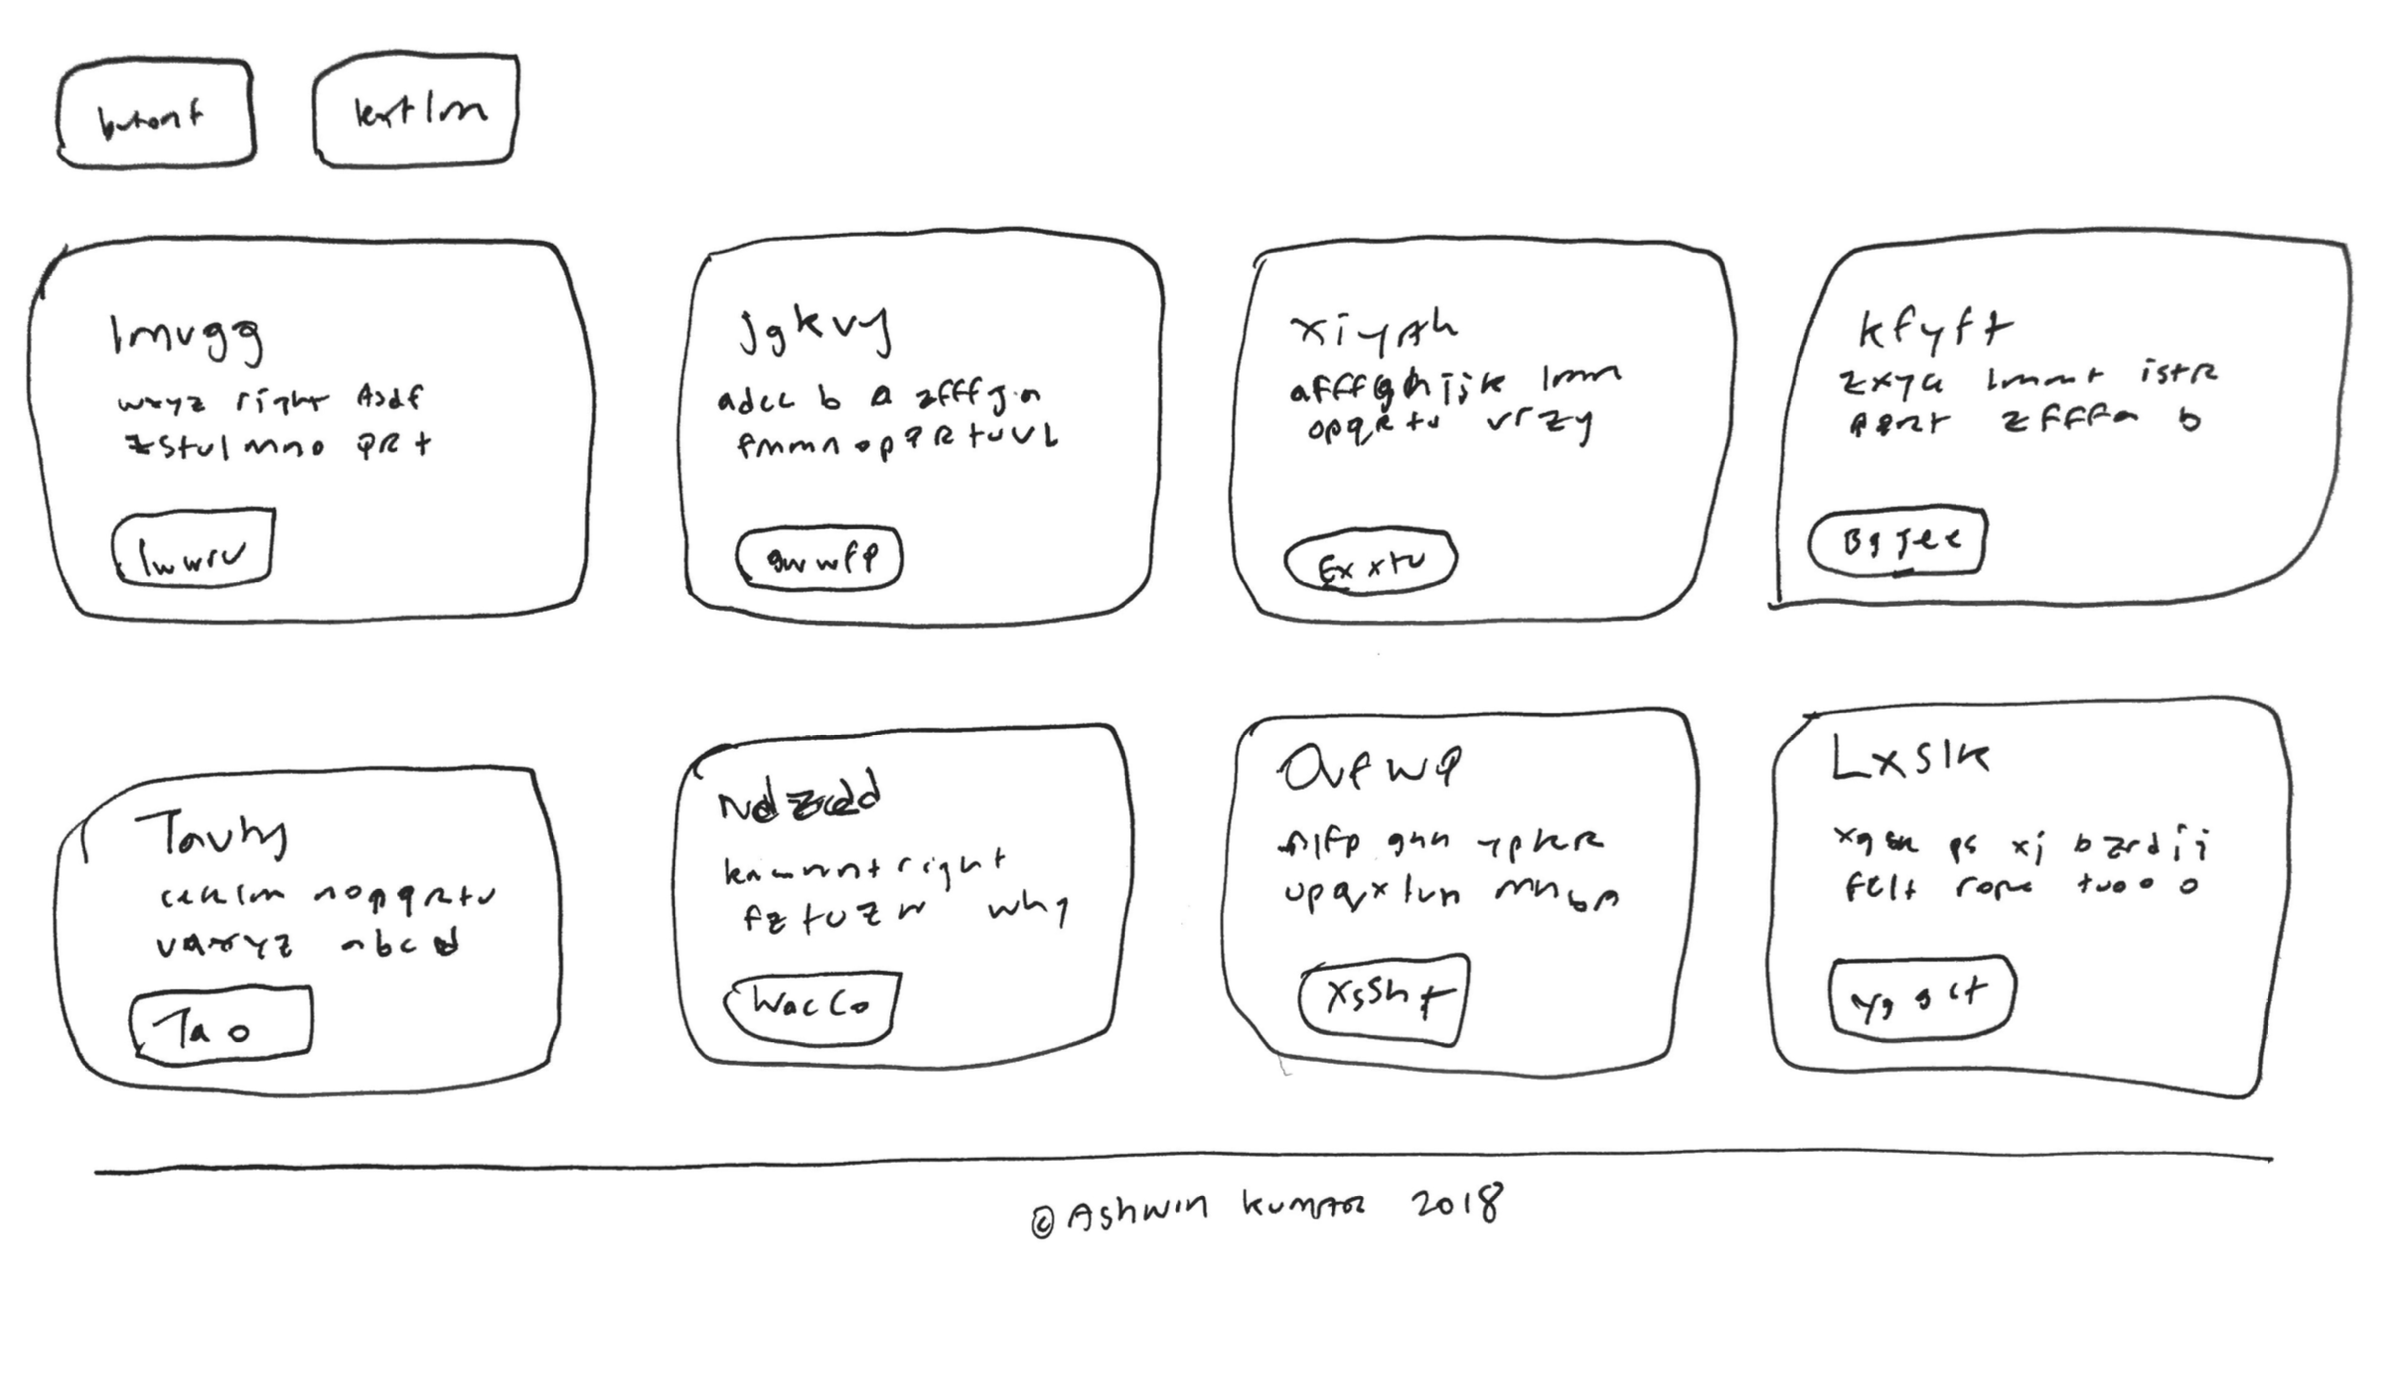

In [0]:
import PIL.Image 
from IPython.display import Image
gui_image = '/content/pix2code/test_gui.png'
im = PIL.Image .open(gui_image)
w, h = im.size
Image(filename='/content/pix2code/test_gui.png' ,width=int(w/3), height=int(h/3) )

In [0]:
!mkdir /content/pix2code/code
%cd /content/pix2code/model

# generate DSL code (.gui file), the default search method is greedy
# usage: sample.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#./sample.py ../bin pix2code ../test_gui.png ../code

# equivalent to command above
#./sample.py ../bin pix2code ../test_gui.png ../code greedy

# generate DSL code with beam search and a beam width of size 3
!./sample.py ../bin pix2code ../test_gui.png ../code 3

mkdir: cannot create directory ‘/content/pix2code/code’: File exists
/content/pix2code/model
Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2019-03-19 10:45:52.246398: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-19 10:45:52.246713: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x22a0c6e0 executing computations on platform Host. Devices:
2019-03-19 10:45:52.246801: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-19 10:45:52.346235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-19 10:45:52.346760: I tensorflow/compiler/xla/service/service.cc:150

# Compiler

ขั้นตอนสุดท้ายคอมไพล์ไฟล์ .gui ให้กลายเป็นโค้ด

**ตัวอย่างคอมไพล์โค้ดเป็น HTML/CSS**

In [0]:
%cd /content/pix2code/compiler

# compile .gui file to Android XML UI
#./android-compiler.py <input file path>.gui

# compile .gui file to iOS Storyboard
#./ios-compiler.py <input file path>.gui

# compile .gui file to HTML/CSS (Bootstrap style)
!./web-compiler.py /content/pix2code/code/test_gui.gui

!ls /content/pix2code/code

/content/pix2code/compiler
00CDC9A8-3D73-4291-90EF-49178E408797.gui  drawn_example1.gui
0173F54E-D99E-43E6-A6B0-B9087837E36A.gui  drawn_example2.gui
01D23C26-B39F-475F-9961-9DAFF0B987A3.gui  drawn_example3.gui
042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui  test_gui.gui
0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.gui  test_gui.html
3FFBB381-17C9-4078-B038-E2CA2F200BA7.gui


**ตัวอย่างไฟล์ HTML/CSS ที่ AI สร้างมาจากภาพ GUI เพียงภาพเดียว**

In [0]:
from IPython.display import HTML
HTML(filename='/content/pix2code/code/test_gui.html') 

**ตัวอย่างคอมไพล์เป็นโค้ดบน Android** (ยังมี error เกิดขึ้น)

In [0]:
!./android-compiler.py /content/pix2code/code/drawn_example1.gui
!ls ../code

Traceback (most recent call last):
  File "./android-compiler.py", line 40, in <module>
    compiler.compile(input_file_path, output_file_path, rendering_function=render_content_with_text)
  File "/content/pix2code/compiler/classes/Compiler.py", line 40, in compile
    output_html = self.root.render(self.dsl_mapping, rendering_function=rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 24, in render
    content += child.render(mapping, rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 24, in render
    content += child.render(mapping, rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 26, in render
    value = mapping[self.key]
KeyError: 'btn-inactive'
00CDC9A8-3D73-4291-90EF-49178E408797.gui  drawn_example1.gui
0173F54E-D99E-43E6-A6B0-B9087837E36A.gui  drawn_example2.gui
01D23C26-B39F-475F-9961-9DAFF0B987A3.gui  drawn_example3.gui
042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui  test_gui.gui
0C8D1647-C0B7-43A3-

**ตัวอย่างคอมไพล์เป็นโค้ดบน iOs**  (ยังมี error เกิดขึ้น)

In [0]:
!./ios-compiler.py /content/pix2code/code/0C8D1647-C0B7-43A3-AB68-AB4F8D7DC234.gui
!ls ../code

Traceback (most recent call last):
  File "./ios-compiler.py", line 40, in <module>
    compiler.compile(input_file_path, output_file_path, rendering_function=render_content_with_text)
  File "/content/pix2code/compiler/classes/Compiler.py", line 40, in compile
    output_html = self.root.render(self.dsl_mapping, rendering_function=rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 24, in render
    content += child.render(mapping, rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 24, in render
    content += child.render(mapping, rendering_function)
  File "/content/pix2code/compiler/classes/Node.py", line 26, in render
    value = mapping[self.key]
KeyError: 'btn-inactive'
00CDC9A8-3D73-4291-90EF-49178E408797.gui  drawn_example1.gui
0173F54E-D99E-43E6-A6B0-B9087837E36A.gui  drawn_example2.gui
01D23C26-B39F-475F-9961-9DAFF0B987A3.gui  drawn_example3.gui
042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui  test_gui.gui
0C8D1647-C0B7-43A3-AB68

# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning